In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.evaluation.evaluation import calculate_metrics

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_assets = pd.read_csv(r'output_data/df_util.csv')

In [98]:
# Call the calculate_metrics function: DF_TRAIN!!
metrics, df_test_with_metrics = calculate_metrics(df_test['precio'], df_test['precio_mean_barrio'], df_test)

# Print the calculated metrics
print("Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Metrics:
ME - Mean Error: -4208.9819072604805
MAE - Mean Absolute Error: 169362.84475361544
MAPE - Mean Absolute Percentage Error: 48.85837417317938
RMSE - Root Mean Squared Error: 320104.4197078232
R2 - Coefficient of Determination: 0.4108176984298131


In [133]:
cols_df_evaluation=['model', 'mean_error', 'mae', 'mape', 'ape', 'rmse', 'r2']
df_evaluation=pd.DataFrame(columns=cols_df_evaluation)

In [137]:
new_row = {
    'model': 'Your_Model_Name',  # Replace 'Your_Model_Name' with the name of your model
    'mean_error': metrics['ME - Mean Error'],
    'mae': metrics['MAE - Mean Absolute Error'],
    'mape': metrics['MAPE - Mean Absolute Percentage Error'],
    'rmse': metrics['RMSE - Root Mean Squared Error'],
    'r2': metrics['R2 - Coefficient of Determination']
}

df_evaluation = df_evaluation.append(new_row, ignore_index=True)


AttributeError: 'DataFrame' object has no attribute 'append'

In [139]:
# Append the new row to the DataFrame
df_evaluation.loc[len(df_evaluation)] = new_row

In [140]:
df_evaluation

,model,mean_error,mae,mape,ape,rmse,r2
0,Your_Model_Name,-4208.98,169362.84,48.86,NaN,320104.42,0.41


In [123]:
# Convert the metrics dictionary to a list of dictionaries
data = [{'Metric': key, 'Value': value} for key, value in metrics.items()]

# Create the DataFrame
new_df = pd.DataFrame(data)

# Display the new DataFrame
print(new_df)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics, index=['Model'])

# Transpose the DataFrame
metrics_df = metrics_df.T

# Display the new DataFrame
print(metrics_df)


                                  Metric     Value
0                        ME - Mean Error  -4208.98
1              MAE - Mean Absolute Error 169362.84
2  MAPE - Mean Absolute Percentage Error     48.86
3         RMSE - Root Mean Squared Error 320104.42
4      R2 - Coefficient of Determination      0.41
                                          Model
ME - Mean Error                        -4208.98
MAE - Mean Absolute Error             169362.84
MAPE - Mean Absolute Percentage Error     48.86
RMSE - Root Mean Squared Error        320104.42
R2 - Coefficient of Determination          0.41


In [128]:
#dividir por bairro
metrics_df=metrics_df.transpose()
metrics_df

,ME - Mean Error,MAE - Mean Absolute Error,MAPE - Mean Absolute Percentage Error,RMSE - Root Mean Squared Error,R2 - Coefficient of Determination
Model,-4208.98,169362.84,48.86,320104.42,0.41


In [129]:
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

In [130]:
metrics_df
#TODO: add variables median perc error, %cases with error>0,05, etc 

,Model,ME - Mean Error,MAE - Mean Absolute Error,MAPE - Mean Absolute Percentage Error,RMSE - Root Mean Squared Error,R2 - Coefficient of Determination
0,Model,-4208.98,169362.84,48.86,320104.42,0.41


In [84]:
metrics, df_test_with_metrics = calculate_metrics(df_test['precio'], df_test['precio_mean_barrio'], df_test)

c:\Users\aimartins\OneDrive - Parfois, SA\Desktop\MDS6\MDS6-IDEALISTA\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Normality of error terms/residuals')

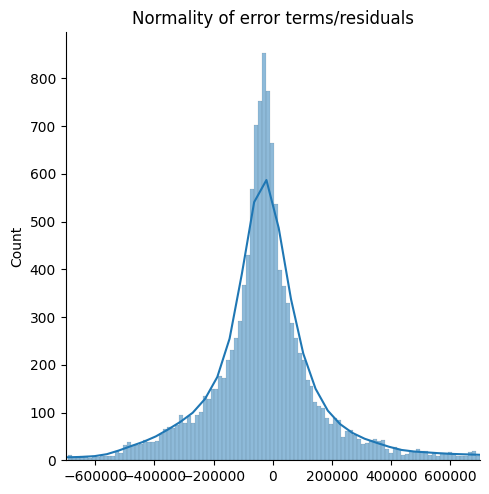

In [100]:
sns.displot(df_test['precio']-df_test['precio_mean_barrio'],kde=True)
plt.xlim(-700000, 700000)
plt.title('Normality of error terms/residuals')

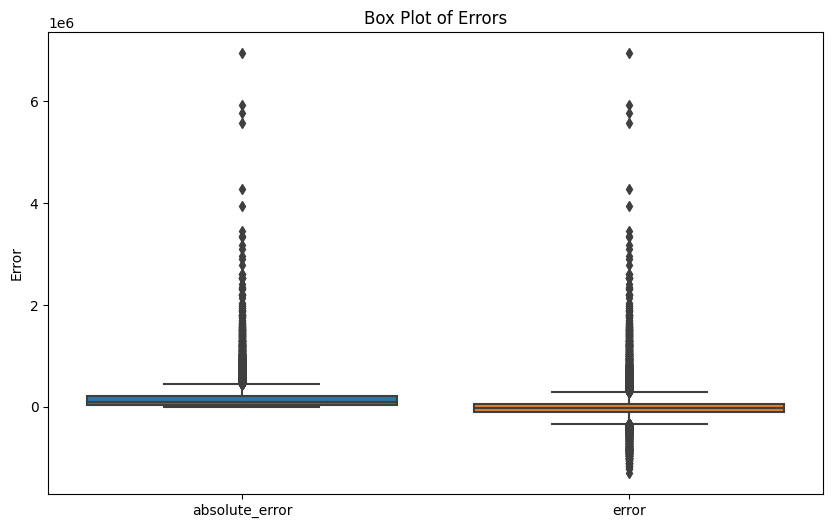

In [119]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Select the error columns from the DataFrame
error_columns = ['absolute_error', 'error']

# Create a box plot for the error columns
sns.boxplot(data=df_test_with_metrics[error_columns], orient='v')

# Set labels and title
plt.ylabel('Error')
plt.title('Box Plot of Errors')


In [2]:
from typing import Any, List
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [3]:
def get_pipeline(
    base_model: Any,
    impute: bool,
    scale: bool,
    encode: bool,
    impute_model_cat: Any = SimpleImputer(strategy="most_frequent"),
    impute_model_num: Any = SimpleImputer(strategy="median"),
    scale_model: Any = StandardScaler(),
    encode_model: Any = OneHotEncoder(handle_unknown="ignore", sparse_output=False),
    cat_features: List[str] = None,
    num_features: List[str] = None,
) -> Pipeline:
    """
    Build a sklearn pipeline for preprocessing and modeling.
    :param base_model: Base model to be added at the end of the pipeline.
    :param impute: Indicates whether missing values imputation should be performed.
    :param scale: Indicates whether numerical feature scaling should be performed.
    :param encode: Indicates whether categorical feature encoding should be performed.
    :param impute_model_cat: Imputation model for categorical features.
      Default is SimpleImputer with strategy "most_frequent".
    :param impute_model_num: Imputation model for numerical features.
      Default is SimpleImputer with strategy "median".
    :param scale_model: Scaling model for numerical features.
      Default is StandardScaler.
    :param encode_model: Encoding model for categorical features.
      Default is OneHotEncoder with "ignore" handling for unknown values.
    :param cat_features: List of names of categorical features.
      Used to apply specific transformations to these features.
    :param num_features: List of names of numerical features.
      Used to apply specific transformations to these features.
    :Return: Sklearn pipeline that includes preprocessing steps and the base model.

    """
    # Create the list of transformers
    cat_transformers = []
    num_transformers = []
    if impute and cat_features:
        cat_transformers.append(("imputer_cat", impute_model_cat))
    if impute and num_features:
        num_transformers.append(("imputer_num", impute_model_num))
    if scale and num_features:
        num_transformers.append(("scaler", scale_model))
    if encode and cat_features:
        cat_transformers.append(("encoder", encode_model))

    if not cat_transformers:
        cat_transformers.append(("passthrough", "passthrough"))
    if not num_transformers:
        num_transformers.append(("passthrough", "passthrough"))

    numeric_transformer = Pipeline(
        steps=num_transformers,
    )
    categorical_transformer = Pipeline(
        steps=cat_transformers,
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_features),
            ("cat", categorical_transformer, cat_features),
        ],
        verbose_feature_names_out=False,
    )

    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", base_model)])

    return pipeline